# IFQ619 - Assignment 2 - Insight Report
## Foundational Data Analytics Techniques



In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import display, HTML

first_name = "Jesse"
last_name = "Tarver"
student_number = "11414472"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---

## QUESTION 1

#### Question: 
In the tech sector, which factors are most common for team member attitudes about mental health? 

#### Data:
[OSMI Mental Health in Tech Survey 2016](https://www.kaggle.com/osmi/mental-health-in-tech-2016)



In [2]:
# Numerical Data Manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

import matplotlib as mpl
sns.set_style('whitegrid')
sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec

# Naive Bayes libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes Classifier based on a Bernoulli Distribution
from sklearn.naive_bayes import GaussianNB       # Naive Bayes Classifier based on a Gaussian Distribution
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes Classifier based on a Multinomial Distribution

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


### 1.1 Question

<h4>In the tech sector, what factors are most common in the contribution of attitudes toward mental health? This question is simple, yet significant as it can shine a 
    light on the internal and external experiences that shape a persons attitude. This is significant for employees (to inspire change) 
    and to the tech companies and management themselves who can promote and take action on change.<h4>

### 1.2 Data

In [3]:
# Import the data
filename = "Data/mental-heath-in-tech-2016_20161114.csv" 


survey_2016 = pd.read_csv(filename)



In [4]:
# ----------- CLEANING THE DATA -----------
# Column rename
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']
survey_2016.columns = renamed_columns

# Sex column needs to be recoded (number of unique values = 70)
survey_2016['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

survey_2016['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

survey_2016['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 3, inplace = True)

# Recode Comp size & country columns (for ease when doing plots)
survey_2016['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)
survey_2016['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
survey_2016['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
survey_2016['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
survey_2016['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

# Max age is 323, min age is 3.
# There are only 5 people that have weird ages (3yo, 15yo, or 99yo or 323 yo.) 
# These people will take the average age of the dataset (the correct calculated one, w/out outliers)
mean_age = survey_2016[(survey_2016['age'] >= 18) | (survey_2016['age'] <= 75)]['age'].mean()
survey_2016['age'].replace(to_replace = survey_2016[(survey_2016['age'] < 18) | (survey_2016['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)

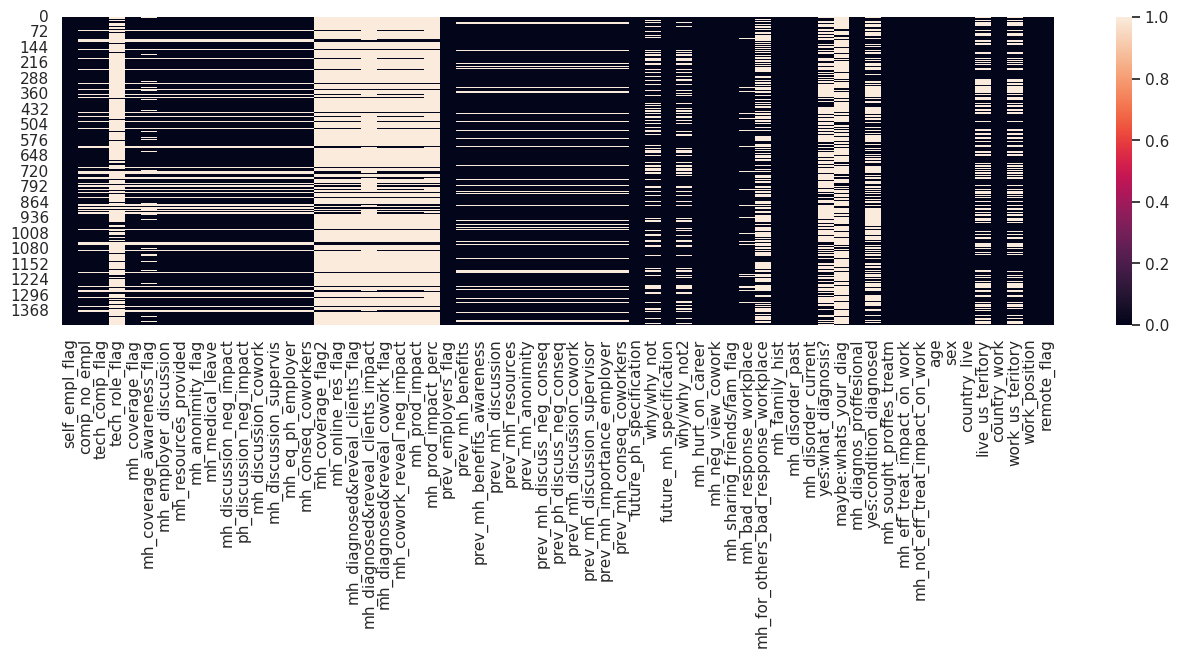

In [5]:
# ----------- MISSING VALUES -----------
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = survey_2016.isna());

In [6]:
# The survey has 1433 rows, so first we will drop all columns where more than half of the observations have missing values
cols = (survey_2016.isna().sum() >= survey_2016.shape[0]/2).tolist()
to_drop = survey_2016.columns[cols]
survey_2016.drop(labels = to_drop, axis = 1, inplace = True)

# Dealing with other missing values
from sklearn.impute import SimpleImputer

# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(survey_2016)
imp_data = pd.DataFrame(data = imp.transform(survey_2016), columns = survey_2016.columns)

In [7]:
# ----------- ENCODING -----------
# Split data into 2 datasets: one that needs to be encoded, one that doesn't need to
cols = [x for x in imp_data.columns if x not in ['age', 'why/why_not', 'why/why_not2', 'country_live',
       'live_us_territory', 'country_work', 'work_us_territory', 'work_position']]

data_to_encode = imp_data[cols]
data_not_encode = imp_data[['why/why_not', 'why/why_not2', 'country_live','country_work',
     'work_position']]

# Importing OneHotEncoder and LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

def encode(data):
    cat_columns = list(data.select_dtypes(include=['category', 'object']))
    column_mask = []
    
    for column_name in list(data.columns.values):
        column_mask.append(column_name in cat_columns)
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False, drop='first')
    
    transformers = [('onehot', ohe, cat_columns)]
    column_transformer = ColumnTransformer(transformers=transformers, remainder='passthrough')
    
    encoded_matrix = column_transformer.fit_transform(data)
    
    for i, col in enumerate(cat_columns):
        data[col] = le.fit_transform(data[col])
    
    return encoded_matrix

encode(data_to_encode)
matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix) # to dataframe
encoded_data.columns = data_to_encode.columns

# Preprocessed data
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)

In [8]:
# ----------- OTHER CHANGES -----------
# There are 53 total countries
# Out of all, most respondents are in US, UK, Canada, Germany, Netherlands and Australia.
# Usually, for a sample to be representative enough for the population, the size needs to be by convention >30.
# Respondents cannot be treated equaly within a response (different background, culture etc.), so we will exclude all nations
        #with a sample size smaller than 30. Because countries with no. responses > 30 are quite similar (well developed countries
        #with big economies and similar living standards), some of the analytics will incorporate all countries as one.

# Keep only countries with no. responses > 30.
imp_data = imp_data[imp_data['country_work'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]
imp_data = imp_data[imp_data['country_live'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]

prep_data = prep_data[prep_data['country_work'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]
prep_data = prep_data[prep_data['country_live'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]

# Unfortunately, the tech flag that identified if the respondent works/ doesn't work in tech had a lot of missing values
# So, we will need to map the 'work_position' column (that didn't have any missing values initially)
# Create the list with tech work positions
tech_list = []
tech_list.append(imp_data[imp_data['work_position'].str.contains('Back-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Front-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Dev')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('DevOps')]['work_position'].tolist())

# Reshape the list (that is a list of lists) and remove duplicates
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

# Create a new column and recode it
imp_data['tech_flag'] = imp_data['work_position']
imp_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
remain_list = imp_data['tech_flag'].unique()[1:].tolist()

imp_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

# The same for prep_data
# Create a new column and recode it
prep_data['tech_flag'] = prep_data['work_position']
prep_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
prep_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)

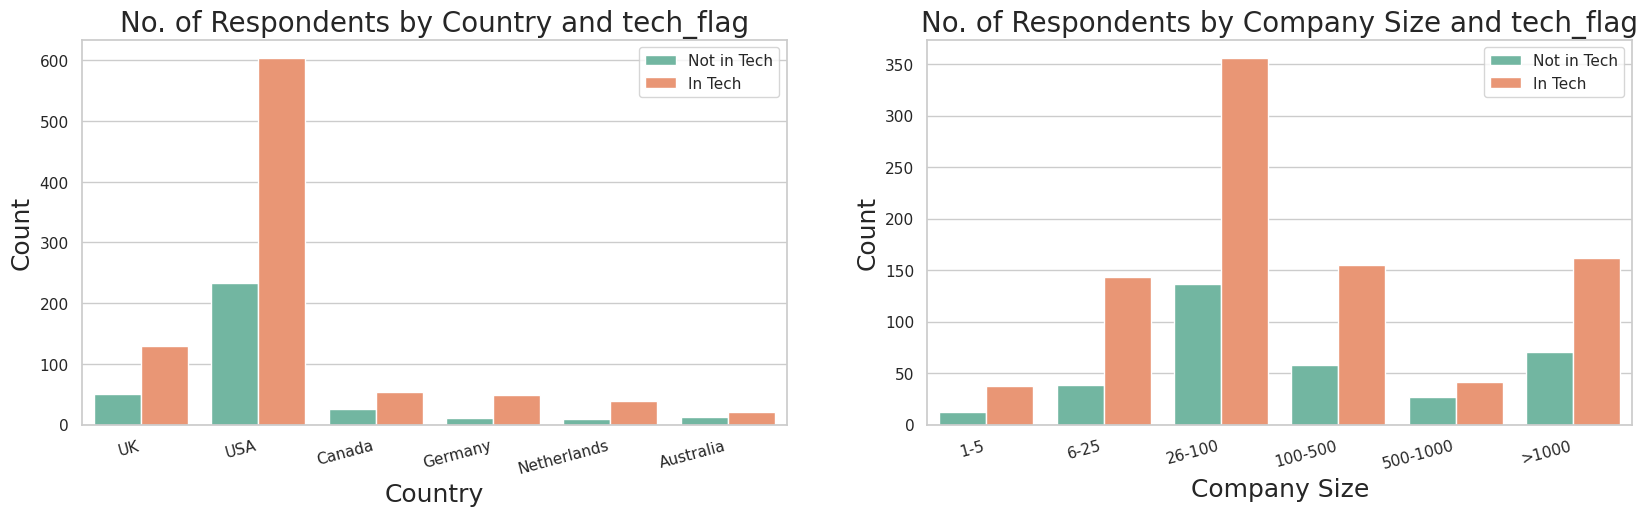

<Figure size 1600x400 with 0 Axes>

In [9]:
# Most respondents are tech and also most of them are in US.
# Most techs are in medium and large companies
# For future analysis, we will exclude all people non-tech - as this analysis focuses on mental health in tech

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# plt.suptitle('Main Title')

# No of respondents by Country
sns.countplot(x = imp_data['country_live'], hue = imp_data['tech_flag'], ax=ax1)
ax1.set_title('No. of Respondents by Country and tech_flag', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = imp_data['comp_no_empl'], hue = imp_data['tech_flag'], ax=ax2, 
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'])
ax2.set_title('No. of Respondents by Company Size and tech_flag', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);

<Figure size 1600x500 with 0 Axes>

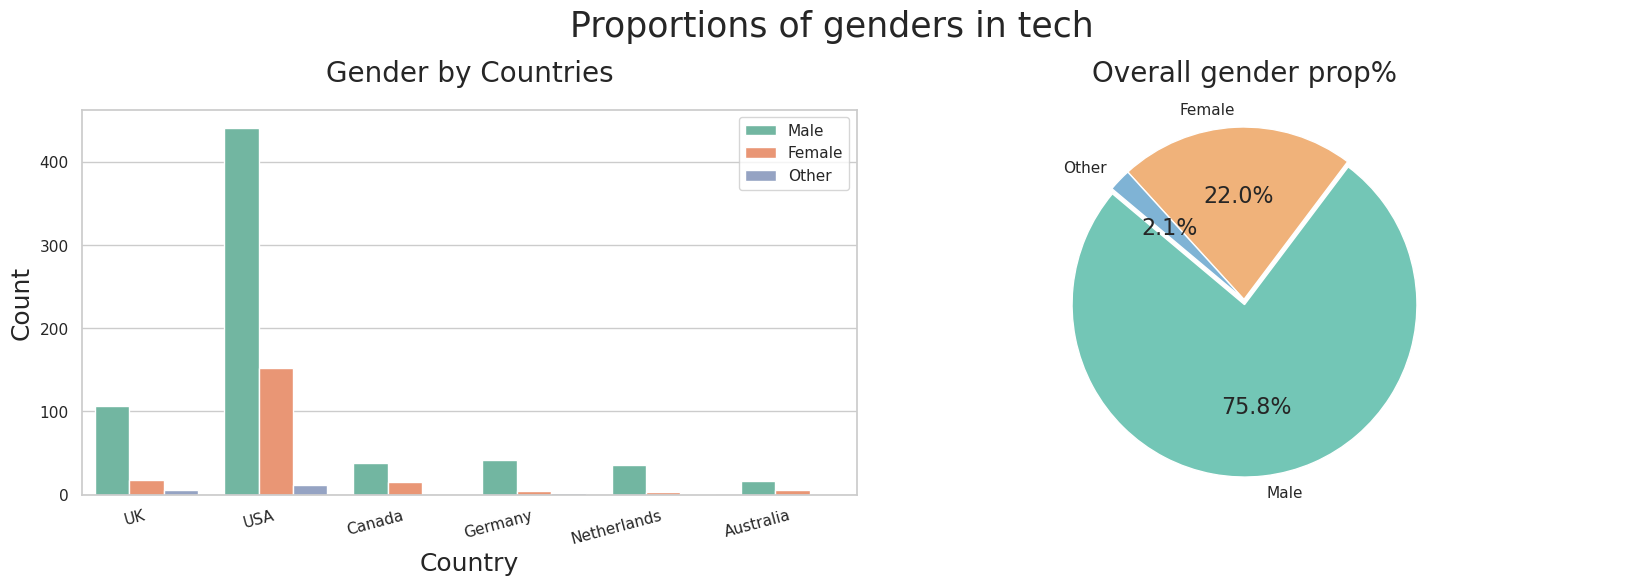

In [10]:
# Most respondents are male

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Proportions of genders in tech', fontsize = 25, y=1.08)

# Pie Chart
all_techs = imp_data[imp_data['tech_flag'] == 1]['sex'].count()
males = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['sex'] == 1.0)]['sex'].count()
females = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['sex'] == 2.0)]['sex'].count()
other = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['sex'] == 3.0)]['sex'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 20)

# Barchart
sns.countplot(x = imp_data[imp_data['tech_flag'] == 1]['country_live'], hue = imp_data['sex'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Gender by Countries', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Male', 'Female', 'Other']);

In [11]:
imp_data[imp_data['tech_flag'] == 1]['age'].describe()

count     894.0
unique     48.0
top        30.0
freq       62.0
Name: age, dtype: float64

<Figure size 1600x500 with 0 Axes>

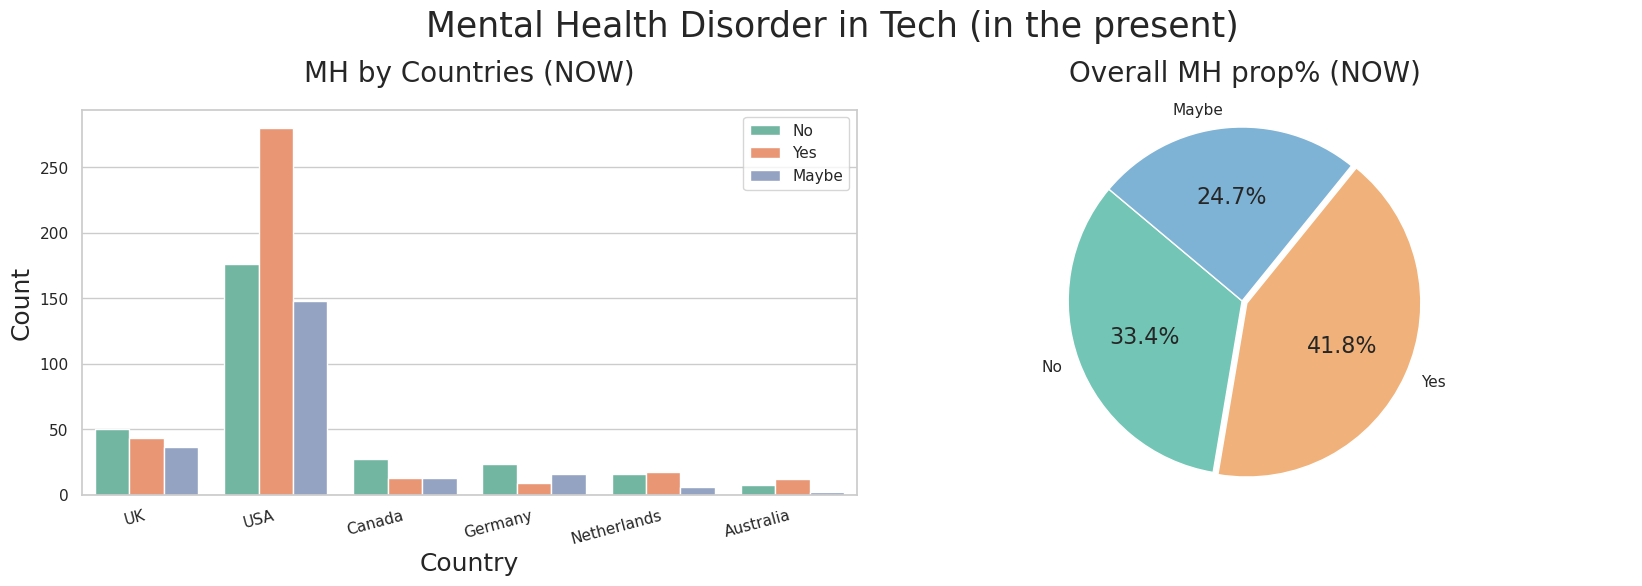

In [12]:
# ----------- NOW -----------

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the present)', fontsize = 25, y=1.08)

# Pie Chart (Now)
all_techs_now = imp_data[imp_data['tech_flag'] == 1]['mh_disorder_current'].count()
no_now = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_current'] == 'No')]['mh_disorder_current'].count()
yes_now = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_current'] == 'Yes')]['mh_disorder_current'].count()
maybe_now = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_current'] == 'Maybe')]['mh_disorder_current'].count()

labels = 'No', 'Yes', 'Maybe'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 20)

# Barchart (now)
sns.countplot(x = imp_data[imp_data['tech_flag'] == 1]['country_live'], hue = imp_data['mh_disorder_current'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend();

<Figure size 1600x500 with 0 Axes>

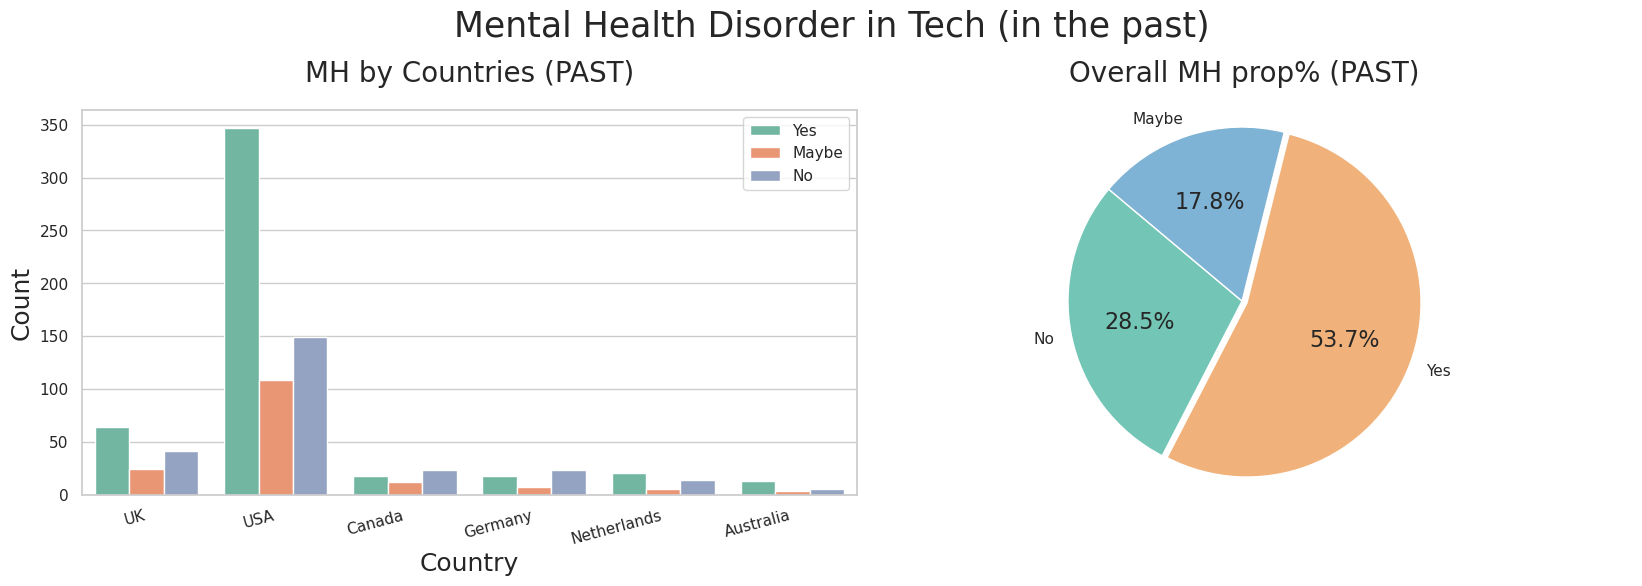

In [13]:
# ----------- PAST -----------

_ = plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the past)', fontsize = 25, y=1.08)

# Pie Chart (Past)
all_techs_past = imp_data[imp_data['tech_flag'] == 1]['mh_disorder_current'].count()
no_past = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_past'] == 'No')]['mh_disorder_past'].count()
yes_past = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_past'] == 'Yes')]['mh_disorder_past'].count()
maybe_past = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_past'] == 'Maybe')]['mh_disorder_past'].count()

labels = 'No', 'Yes', 'Maybe'
sizes = [no_past/all_techs_past, yes_past/all_techs_past, maybe_past/all_techs_past]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (PAST)', pad = 20, fontsize = 20)

# Barchart (Past)
sns.countplot(x = imp_data[imp_data['tech_flag'] == 1]['country_live'], hue = imp_data['mh_disorder_past'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (PAST)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend();

### Are these companies taking Mental Health seriously?

    From the survey, it would seem yes, but not as much as it would be necessary. More than half of respondents have Mental Health Coverage provided, but not the resources of finding more information. Meaning most companies address mental health, but do not actively help sufferers. 

    More than 70% of respondents do NOT know if their annonimity would be protected when talking to superior about their mental health problems, while half of them are unsure if  the company would grant them a mental health medical leave.

    Lastly, most respondents do not know if their company is taking mental health problems as serious as physical health. The most uplifting find is, 94% of respondents do not think that there would be negative consequences for coworkers that experience mental health problems.


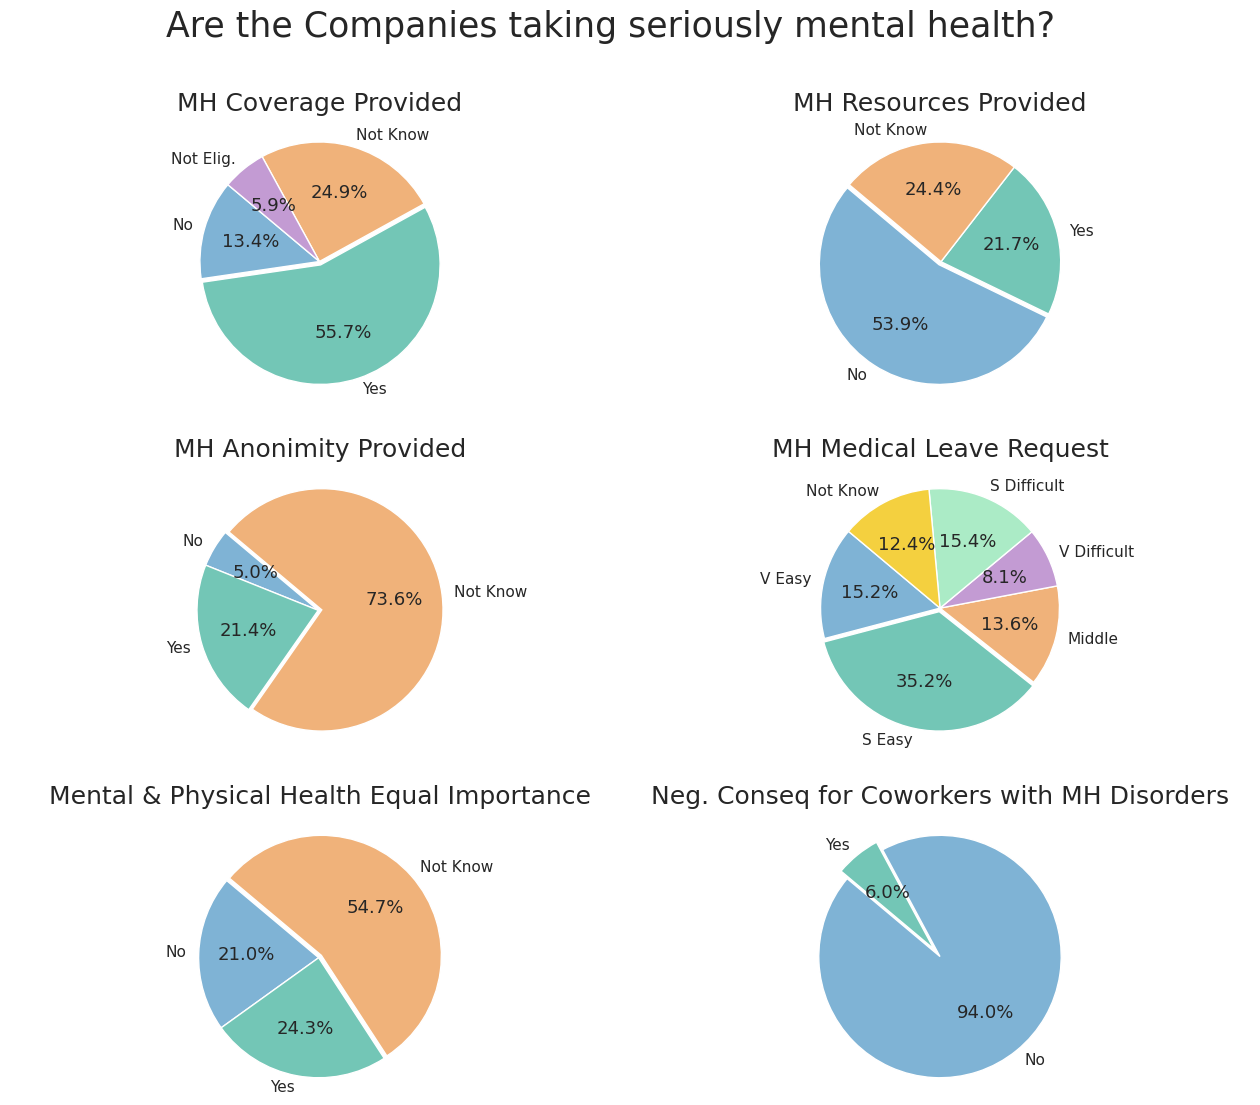

In [14]:
mpl.rcParams['font.size'] = 13

fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Are the Companies taking seriously mental health?', fontsize = 25, y = 1)

# Does your employer provide mental health benefits as part of healthcare coverage?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_coverage_flag'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == 'No')]['mh_coverage_flag'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == 'Yes')]['mh_coverage_flag'].count()
not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == "I don't know")]['mh_coverage_flag'].count()
not_elig_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == 'Not eligible for coverage / N/A')]['mh_coverage_flag'].count()

labels = 'No', 'Yes', 'Not Know', 'Not Elig.'
sizes = [no_/all_, yes_/all_, not_know_/all_, not_elig_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
explode = (0, 0.03, 0, 0)  # explode 1st slice

ax[0][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Coverage Provided', pad = 14, fontsize = 18)

# Does your employer offer resources to learn more about mental health concerns and options for seeking help?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_resources_provided'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_resources_provided'] == 'No')]['mh_resources_provided'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_resources_provided'] == 'Yes')]['mh_resources_provided'].count()
not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_resources_provided'] == "I don't know")]['mh_resources_provided'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0)  # explode 1st slice

ax[0][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Resources Provided', pad = 14, fontsize = 18)

# Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_anonimity_flag'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_anonimity_flag'] == 'No')]['mh_anonimity_flag'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_anonimity_flag'] == 'Yes')]['mh_anonimity_flag'].count()
not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_anonimity_flag'] == "I don't know")]['mh_anonimity_flag'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0, 0.03)  # explode 1st slice

ax[1][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][0].axis('equal')
ax[1][0].set_title('MH Anonimity Provided', pad = 14, fontsize = 18)

# If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_medical_leave'].count()
veasy_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == 'Very easy')]['mh_medical_leave'].count()
seasy_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == 'Somewhat easy')]['mh_medical_leave'].count()
middle_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "Neither easy nor difficult")]['mh_medical_leave'].count()
vdiff_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "Very difficult")]['mh_medical_leave'].count()
sdiff_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "Somewhat difficult")]['mh_medical_leave'].count()
not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "I don't know")]['mh_medical_leave'].count()

labels = 'V Easy', 'S Easy', 'Middle', 'V Difficult', 'S Difficult', 'Not Know'
sizes = [veasy_/all_, seasy_/all_, middle_/all_, vdiff_/all_, sdiff_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
explode = (0, 0.03, 0, 0, 0, 0)  # explode 1st slice

ax[1][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][1].axis('equal')
ax[1][1].set_title('MH Medical Leave Request', pad = 14, fontsize = 18)

# Do you feel that your employer takes mental health as seriously as physical health?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_eq_ph_employer'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_eq_ph_employer'] == 'No')]['mh_eq_ph_employer'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_eq_ph_employer'] == 'Yes')]['mh_eq_ph_employer'].count()
not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_eq_ph_employer'] == "I don't know")]['mh_eq_ph_employer'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0, 0.03)  # explode 1st slice

ax[2][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[2][0].axis('equal')
ax[2][0].set_title('Mental & Physical Health Equal Importance', pad = 14, fontsize = 18)

# Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_conseq_coworkers'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_conseq_coworkers'] == 'No')]['mh_conseq_coworkers'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_conseq_coworkers'] == 'Yes')]['mh_conseq_coworkers'].count()

labels = 'No', 'Yes'
sizes = [no_/all_, yes_/all_]
colors = ['#7FB3D5', '#73C6B6']
explode = (0.08, 0)  # explode 1st slice

ax[2][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[2][1].axis('equal')
ax[2][1].set_title('Neg. Conseq for Coworkers with MH Disorders', pad = 14, fontsize = 18);

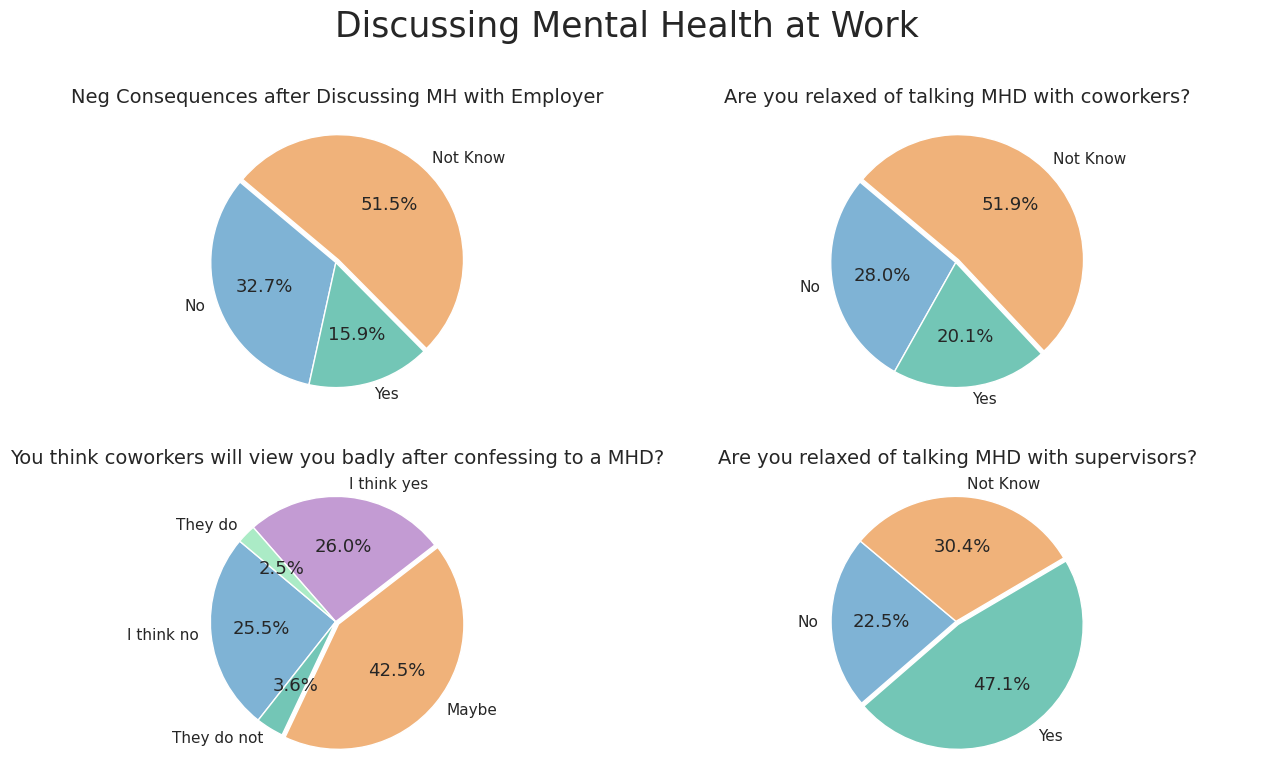

In [15]:
fig, ax = plt.subplots(figsize = (16, 8), ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Discussing Mental Health at Work', fontsize = 25, y = 1.04)

# Do you think that discussing a mental health disorder with your employer would have negative consequences?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_discussion_neg_impact'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_neg_impact'] == 'No')]['mh_discussion_neg_impact'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_neg_impact'] == 'Yes')]['mh_discussion_neg_impact'].count()
maybe_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_neg_impact'] == 'Maybe')]['mh_discussion_neg_impact'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, maybe_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0, 0.03)  # explode 1st slice

ax[0][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('Neg Consequences after Discussing MH with Employer', pad = 14, fontsize = 14)

# Would you feel comfortable discussing a mental health disorder with your coworkers?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_discussion_cowork'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_cowork'] == 'No')]['mh_discussion_cowork'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_cowork'] == 'Yes')]['mh_discussion_cowork'].count()
maybe_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_cowork'] == 'Maybe')]['mh_discussion_cowork'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, maybe_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0, 0.03)  # explode 1st slice

ax[0][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('Are you relaxed of talking MHD with coworkers?', pad = 14, fontsize = 14)

# Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_neg_view_cowork'].count()
no_t = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_neg_view_cowork'] == "No, I don't think they would")]['mh_neg_view_cowork'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_neg_view_cowork'] == "No, they do not")]['mh_neg_view_cowork'].count()
maybe_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_neg_view_cowork'] == 'Maybe')]['mh_neg_view_cowork'].count()
yes_t = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_neg_view_cowork'] == 'Yes, I think they would')]['mh_neg_view_cowork'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_neg_view_cowork'] == 'Yes, they do')]['mh_neg_view_cowork'].count()

labels = 'I think no', 'They do not', 'Maybe', 'I think yes', 'They do'
sizes = [no_t/all_, no_/all_, maybe_/all_, yes_t/all_, yes_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6']
explode = (0, 0, 0.03, 0, 0)  # explode 1st slice

ax[1][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][0].axis('equal')
ax[1][0].set_title('You think coworkers will view you badly after confessing to a MHD?', pad = 14, fontsize = 14)

# Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_discussion_supervis'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_supervis'] == 'No')]['mh_discussion_supervis'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_supervis'] == 'Yes')]['mh_discussion_supervis'].count()
maybe_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_discussion_supervis'] == 'Maybe')]['mh_discussion_supervis'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, maybe_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0.03, 0)  # explode 1st slice

ax[1][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][1].axis('equal')
ax[1][1].set_title('Are you relaxed of talking MHD with supervisors?', pad = 14, fontsize = 14);


### Discussing Mental Health at Work

    67% of respondents do not know or agree that there were negative consequences about talking of Mental Health with the Employer. There is also a big percentage of people that do not know if they would even mention mental health to an employer.

    There is an alarming amount of people that think or actually know that coworkers will view them badly after confessing to having a mental health problem.

    almost half would talk about mental health to a supervisor.


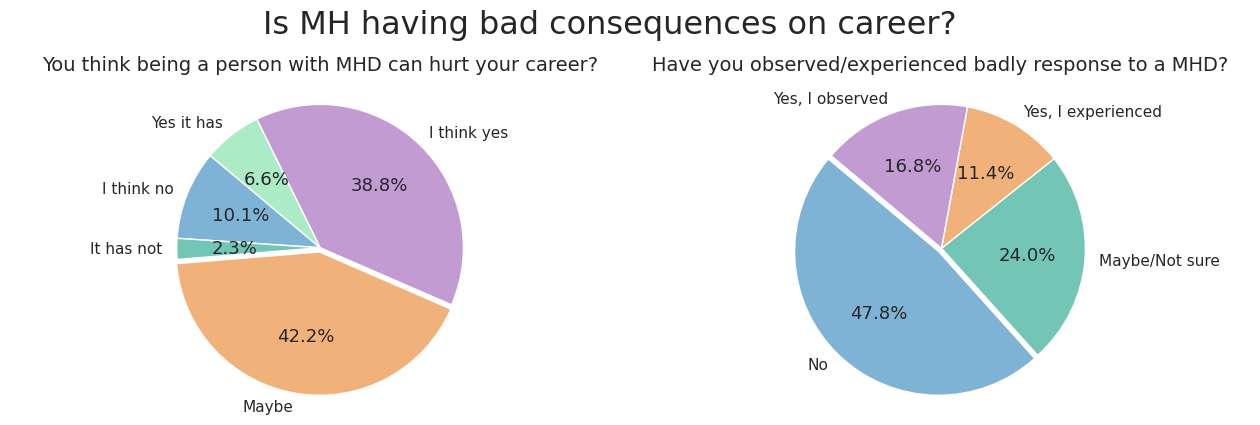

In [16]:
fig, (ax1, ax2) = plt.subplots(figsize = (16, 4), ncols=2, nrows=1)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Is MH having bad consequences on career?', fontsize = 23, y = 1.1)

# Do you feel that being identified as a person with a mental health issue would hurt your career?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_hurt_on_career'].count()
no_t = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_hurt_on_career'] == "No, I don't think it would")]['mh_hurt_on_career'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_hurt_on_career'] == "No, it has not")]['mh_hurt_on_career'].count()
maybe_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_hurt_on_career'] == 'Maybe')]['mh_hurt_on_career'].count()
yes_t = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_hurt_on_career'] == 'Yes, I think it would')]['mh_hurt_on_career'].count()
yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_hurt_on_career'] == 'Yes, it has')]['mh_hurt_on_career'].count()

labels = 'I think no', 'It has not', 'Maybe', 'I think yes', 'Yes it has'
sizes = [no_t/all_, no_/all_, maybe_/all_, yes_t/all_, yes_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6']
explode = (0, 0, 0.03, 0, 0)  # explode 1st slice

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('You think being a person with MHD can hurt your career?', pad = 14, fontsize = 14)

# Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
all_ = imp_data[imp_data['tech_flag'] == 1]['mh_bad_response_workplace'].count()
no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_bad_response_workplace'] == "No")]['mh_bad_response_workplace'].count()
maybe_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_bad_response_workplace'] == 'Maybe/Not sure')]['mh_bad_response_workplace'].count()
yes_e = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_bad_response_workplace'] == 'Yes, I experienced')]['mh_bad_response_workplace'].count()
yes_o = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_bad_response_workplace'] == 'Yes, I observed')]['mh_bad_response_workplace'].count()

labels = 'No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed'
sizes = [no_/all_, maybe_/all_, yes_e/all_, yes_o/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
explode = (0.03, 0, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Have you observed/experienced badly response to a MHD?', pad = 14, fontsize = 14);


### Would Mental Health have consequences on my career?

    Most people think or are certain that having a Mental Health Disorder would hurt their career, however, than half of respondents didn't  observe or experience a bad response to Mental Health around them.

    These questions still show a bias about mental health and its actual real consequences on someones life.


### Predictions - Machine Learning (Naive Bayes)

    Based on the above insights into mental health and tech, it is necessary to extend the question further. It is important to try and use this data in a machine learning model to predict 
    whether or not someone has a mental health disorder ("has_current_mental_health_disorder" variable")

In [17]:
if 'mh_disorder_current' in imp_data.columns:
    print("'mh_disorder_current' exists in imp_data.")
else:
    print("'mh_disorder_current' does not exist in imp_data.")


'mh_disorder_current' exists in imp_data.


### I just wanted to check that my variable exists the dataframe I wanted to use, furthermore to the below if the variable was, I would then map the data, convert to a float, and then add 
## it to my other data frame. 

In [18]:
# Check if 'mh_disorder_current' exists in imp_data
if 'mh_disorder_current' in imp_data.columns:
    # Map categorical values to numeric values
    mapping = {'No': 0, 'Yes': 1, 'Maybe': 2}  # Add more mappings as needed
    imp_data['mh_disorder_current'] = imp_data['mh_disorder_current'].replace(mapping)
    
    # Convert to float data type
    imp_data['mh_disorder_current'] = imp_data['mh_disorder_current'].astype(float)
    
    # Add 'mh_disorder_current' to 'prep_data'
    prep_data['mh_disorder_current'] = imp_data['mh_disorder_current']
    
    print("'mh_disorder_current' added to 'prep_data' and encoded.")
    # Check the data type after adding
    print("Data type of 'mh_disorder_current' column:", prep_data['mh_disorder_current'].dtype)
else:
    print("Column 'mh_disorder_current' does not exist in imp_data.")


'mh_disorder_current' added to 'prep_data' and encoded.
Data type of 'mh_disorder_current' column: float64


### I wanted confirmation that it was added and converted so I could start putting my variable into training and test data frames. Filling NaN values where I can.

In [19]:
# Excluding non numeric columns from dataset
model_data = prep_data.copy()
col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['int64', 'float64']]
model_data = model_data[col_numeric]

# Model data is our new dataset for predicting variable 'mh_disorder_current'

# Feature variables and target variable
y = model_data['mh_disorder_current']

cols = [col for col in model_data.columns if col not in ['mh_disorder_current']]
X = model_data[cols]
# Handle NaN values (example: imputation with mean)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
# Check for NaN values in X and y
print("NaN values in X:")
print(X.isna().sum())

print("NaN values in y:")
print(y.isna().sum())

# Handle NaN values (example: imputation with mean)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



NaN values in X:
self_empl_flag                     0
comp_no_empl                       0
tech_comp_flag                     0
mh_coverage_flag                   0
mh_coverage_awareness_flag         0
mh_employer_discussion             0
mh_resources_provided              0
mh_anonimity_flag                  0
mh_medical_leave                   0
mh_discussion_neg_impact           0
ph_discussion_neg_impact           0
mh_discussion_cowork               0
mh_discussion_supervis             0
mh_eq_ph_employer                  0
mh_conseq_coworkers                0
prev_employers_flag                0
prev_mh_benefits                   0
prev_mh_benefits_awareness         0
prev_mh_discussion                 0
prev_mh_resources                  0
prev_mh_anonimity                  0
prev_mh_discuss_neg_conseq         0
prev_ph_discuss_neg_conseq         0
prev_mh_discussion_cowork          0
prev_mh_discussion_supervisor      0
prev_mh_importance_employer        0
prev_mh_conseq_cowork

### The above is to check there are 0 NaN values. I then made a predefined function before I run my Naive Bayes.

In [20]:
 #Predefined function
def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, preds), '\n',
          'Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

In [21]:
print('NaN in y_train:', y_train.isna().sum())
print('NaN in y_test:', y_test.isna().sum())


NaN in y_train: 0
NaN in y_test: 0


In [22]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)



In [23]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, name='Naive Bayes')



--- Naive Bayes --- 
 [[135  42  16]
 [ 10 138  12]
 [ 28  21  28]] 
 Accuracy: 0.7 



### After running my Naive Bayes (Which I used to get an accuracy of prediction) before moving onto a Conditional probability BN for the variable

In [58]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Create an empty Bayesian Network
model = BayesianNetwork()

# Add a single node for mh_disorder_current
model.add_node('mh_disorder_current')


# Define Conditional Probability Distribution (CPD) for mh_disorder_current
cpd_mh_disorder = TabularCPD(variable='mh_disorder_current', variable_card=2,
                             values=[[0.7], [0.3]])

# Add the CPD to the model
model.add_cpds(cpd_mh_disorder)

# Verify the model
assert model.check_model()


In [50]:

print(model.get_cpds('mh_disorder_current'))


+------------------------+-----+
| mh_disorder_current(0) | 0.7 |
+------------------------+-----+
| mh_disorder_current(1) | 0.3 |
+------------------------+-----+
